## File Upload

In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Copy the file to Google Drive
shutil.copy('/content/archive.zip', '/content/drive/My Drive/Synthetic.zip')


In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access the file
file_path = '/content/drive/My Drive/Data_2022.zip'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Unzip the file
!unzip "/content/drive/My Drive/archive.zip" -d "/content/drive/My Drive/Dataset"


Archive:  /content/drive/My Drive/archive.zip
  inflating: /content/drive/My Drive/Dataset/Australia_Grocery_2022Sep.csv  


In [ ]:
# Unzip the file
!unzip "/content/drive/My Drive/data_2022.zip" -d "/content/drive/My Drive/Dataset"

## Let's read and understand the data

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Dataset/data_2022.csv')

df.head()

,Unnamed: 0.1,Unnamed: 0,Sku,city,Package_price,RunDate
0,0,0,1491280P,TEMPE,7.150000,2022-11-09
1,1,1,1491280P,TEMPE,7.138849,2022-11-10
2,2,2,1491280P,TEMPE,7.193904,2022-11-11
3,3,3,1491280P,TEMPE,7.165502,2022-11-12
4,4,4,1491280P,TEMPE,7.135255,2022-11-13


In [2]:
df_1 = pd.read_csv('/content/drive/My Drive/Dataset/Australia_Grocery_2022Sep.csv')

df_1.head()

,index,Postal_code,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,...,Retail_price,Product_Url,Brand,Sku,RunDate,unit_price,unit_price_unit,state,city,tid
0,0,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,$6.50 per 1Kg,approx. 1.1kg,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,1491280P,2022-11-09 08:23:06,6.50,1Kg,NSW,TEMPE,29742568
1,1,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,$9.00 per 1Kg,approx. 600g,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,1718058P,2022-11-09 08:23:06,9.00,1Kg,NSW,TEMPE,29742569
2,2,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50,$7.50 per 1Kg,approx. 600g,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,2565429P,2022-11-09 08:23:06,7.50,1Kg,NSW,TEMPE,29742570
3,3,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38,$4.50 per 1Kg,approx. 750g each,1,...,4.13,https://shop.coles.com.au/a/alexandria/product...,Coles,3199541P,2022-11-09 08:23:06,4.50,1Kg,NSW,TEMPE,29742571
4,4,2044,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,10.50,$8.75 per 1Kg,1.2kg,0,...,11.00,https://shop.coles.com.au/a/alexandria/product...,Coles,2904193P,2022-11-09 08:23:06,8.75,1Kg,NSW,TEMPE,29742572


In [3]:
df.shape


(21815330, 6)

In [4]:
df_1.shape

(488640, 22)

#### Removing unnecessary columns

In [5]:
df_2 = df_1.drop(columns = ['RunDate', 'Package_price'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488640 entries, 0 to 488639
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            488640 non-null  int64  
 1   Postal_code      488640 non-null  int64  
 2   Category         488640 non-null  object 
 3   Sub_category     488640 non-null  object 
 4   Product_Group    488640 non-null  object 
 5   Product_Name     488640 non-null  object 
 6   Price_per_unit   485498 non-null  object 
 7   package_size     487869 non-null  object 
 8   is_estimated     488640 non-null  int64  
 9   is_special       488640 non-null  int64  
 10  in_stock         36454 non-null   object 
 11  Retail_price     136953 non-null  float64
 12  Product_Url      488640 non-null  object 
 13  Brand            488640 non-null  object 
 14  Sku              488640 non-null  object 
 15  unit_price       485498 non-null  float64
 16  unit_price_unit  485498 non-null  obje

In [6]:
df1 = df.drop(columns = ['Unnamed: 0.1','Unnamed: 0'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815330 entries, 0 to 21815329
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Sku            object 
 1   city           object 
 2   Package_price  float64
 3   RunDate        object 
dtypes: float64(1), object(3)
memory usage: 665.8+ MB


#### Let's work on chunks of the data as the size of the data is large

In [7]:
# Convert 'Rundate' to datetime
df1['RunDate'] = pd.to_datetime(df1['RunDate'])

# Sort by 'Rundate'
df_sorted = df1.sort_values(by='RunDate')

# Select the first 81,529 rows
df_selected = df_sorted.head(10000000)

# Display the result
df_selected.head()

,Sku,city,Package_price,RunDate
0,1491280P,TEMPE,7.15,2022-11-09
17185091,1276186P,SORELL,3.00,2022-11-09
5950151,1329180P,ST LUCIA,5.70,2022-11-09
5950204,3474362P,ST LUCIA,4.00,2022-11-09
17185038,5556639P,SORELL,5.00,2022-11-09


### Merging both the datasets on the basis of Sku and city to increase the features for the model which will improve the accuracy

In [8]:
# Perform the left join
merged_df = pd.merge(df_selected, df_2, how='left', on=['Sku', 'city'])

# Display the result
merged_df.head()


,Sku,city,Package_price,RunDate,index,Postal_code,Category,Sub_category,Product_Group,Product_Name,...,is_estimated,is_special,in_stock,Retail_price,Product_Url,Brand,unit_price,unit_price_unit,state,tid
0,1491280P,TEMPE,7.15,2022-11-09,0,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,...,1,0,NaN,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,6.50,1Kg,NSW,29742568
1,1276186P,SORELL,3.00,2022-11-09,387368,9172,Pantry,Confectionery,Chocolate blocks,Excellence Extra Silky White Chocolate Block,...,0,1,NaN,5.0,https://shop.coles.com.au/a/sorell/product/lin...,Lindt,3.00,100G,TAS,30129936
2,1329180P,ST LUCIA,5.70,2022-11-09,136750,4067,Pantry,Sauces,Recipe & meal bases,Passage to India Sri Lankan Coconut & Cashew C...,...,0,0,NaN,NaN,https://shop.coles.com.au/a/moggill/product/pa...,Passage Foods,1.52,100G,QLD,29879318
3,3474362P,ST LUCIA,4.00,2022-11-09,136751,4067,Pantry,Sauces,Recipe & meal bases,Extra Creamy Butter Chicken Simmer Sauce,...,0,0,NaN,NaN,https://shop.coles.com.au/a/moggill/product/sh...,Sharwood's,0.95,100G,QLD,29879319
4,5556639P,SORELL,5.00,2022-11-09,387367,9172,Pantry,Confectionery,Chocolate blocks,Rice Bubbles Crispy Milk Chocolate Block,...,0,0,NaN,NaN,https://shop.coles.com.au/a/sorell/product/cri...,Darrell Lea,3.13,100G,TAS,30129935


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13059230 entries, 0 to 13059229
Data columns (total 22 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Sku              object        
 1   city             object        
 2   Package_price    float64       
 3   RunDate          datetime64[ns]
 4   index            int64         
 5   Postal_code      int64         
 6   Category         object        
 7   Sub_category     object        
 8   Product_Group    object        
 9   Product_Name     object        
 10  Price_per_unit   object        
 11  package_size     object        
 12  is_estimated     int64         
 13  is_special       int64         
 14  in_stock         object        
 15  Retail_price     float64       
 16  Product_Url      object        
 17  Brand            object        
 18  unit_price       float64       
 19  unit_price_unit  object        
 20  state            object        
 21  tid              int64       

Correlation between columns

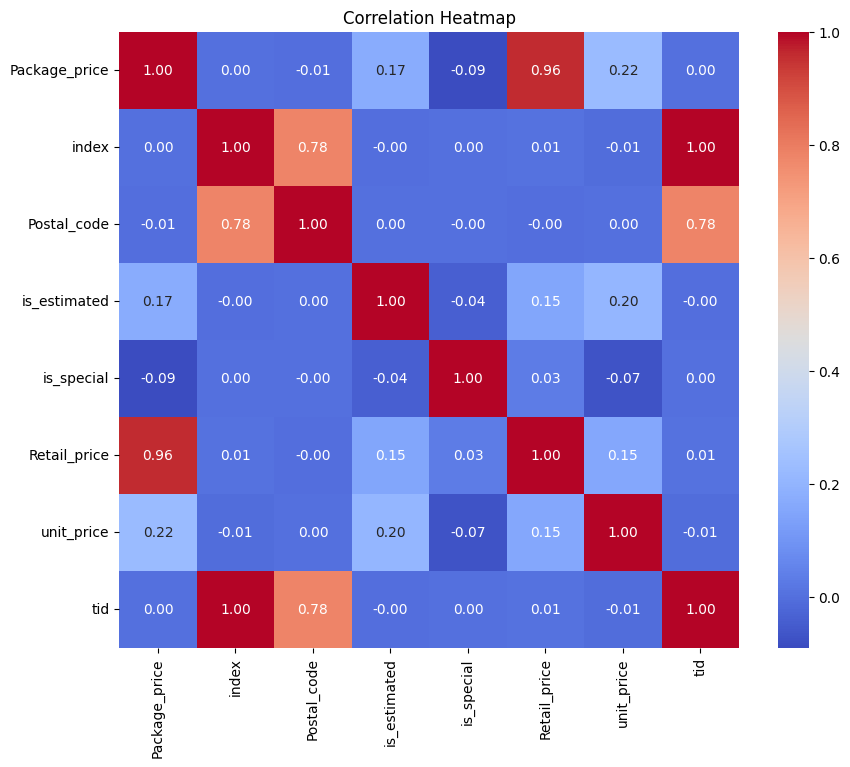

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_df = merged_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
## Let's remove redundant columns

data = merged_df.drop(columns = ['Retail_price', 'index','in_stock'])

# Display all columns
pd.set_option('display.max_columns', None)

data.head()

,Sku,city,Package_price,RunDate,Postal_code,Category,Sub_category,Product_Group,Product_Name,Price_per_unit,package_size,is_estimated,is_special,Product_Url,Brand,unit_price,unit_price_unit,state,tid
0,1491280P,TEMPE,7.15,2022-11-09,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,$6.50 per 1Kg,approx. 1.1kg,1,0,https://shop.coles.com.au/a/alexandria/product...,Coles,6.50,1Kg,NSW,29742568
1,1276186P,SORELL,3.00,2022-11-09,9172,Pantry,Confectionery,Chocolate blocks,Excellence Extra Silky White Chocolate Block,$3.00 per 100G,100g,0,1,https://shop.coles.com.au/a/sorell/product/lin...,Lindt,3.00,100G,TAS,30129936
2,1329180P,ST LUCIA,5.70,2022-11-09,4067,Pantry,Sauces,Recipe & meal bases,Passage to India Sri Lankan Coconut & Cashew C...,$1.52 per 100G,375g,0,0,https://shop.coles.com.au/a/moggill/product/pa...,Passage Foods,1.52,100G,QLD,29879318
3,3474362P,ST LUCIA,4.00,2022-11-09,4067,Pantry,Sauces,Recipe & meal bases,Extra Creamy Butter Chicken Simmer Sauce,$0.95 per 100G,420g,0,0,https://shop.coles.com.au/a/moggill/product/sh...,Sharwood's,0.95,100G,QLD,29879319
4,5556639P,SORELL,5.00,2022-11-09,9172,Pantry,Confectionery,Chocolate blocks,Rice Bubbles Crispy Milk Chocolate Block,$3.13 per 100G,160g,0,0,https://shop.coles.com.au/a/sorell/product/cri...,Darrell Lea,3.13,100G,TAS,30129935


## Let's work on cleaning the columns to scale them

In [13]:
data['Price_per_unit'].value_counts()

,count
Price_per_unit,
$2.00 per 100G,157294
$2.50 per 100G,140916
$1.00 per 100G,137763
$4.00 per 100G,126523
$5.00 per 100G,115375
...,...
$5.31 per 1L,26
$2.46 per 1L,26
$116.69 per 1Kg,26


In [10]:
import re

# Function to convert price to per 1 kg
def convert_to_per_kg(price_str):
    if isinstance(price_str, str):
        match = re.search(r'\$(\d+(\.\d+)?)\s*per\s*(\d+)(Kg|G)', price_str, re.IGNORECASE)
        if match:
            price = float(match.group(1))
            quantity = int(match.group(3))
            unit = match.group(4).lower()
            if (unit == 'kg'):
                return price
            elif unit == 'g':
                return 1000 * price / quantity
            elif unit == 'l':
                return price
            elif unit == 'ml':
                return price * (1000 / quantity)
    else:
        return None

# Apply the conversion function to the 'Price_per_unit' column
data['uniform_price_per_unit'] = data['Price_per_unit'].apply(convert_to_per_kg)
data.head()

,Sku,city,Package_price,RunDate,Postal_code,Category,Sub_category,Product_Group,Product_Name,Price_per_unit,package_size,is_estimated,is_special,Product_Url,Brand,unit_price,unit_price_unit,state,tid,uniform_price_per_unit
0,1491280P,TEMPE,7.15,2022-11-09,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,$6.50 per 1Kg,approx. 1.1kg,1,0,https://shop.coles.com.au/a/alexandria/product...,Coles,6.50,1Kg,NSW,29742568,6.5
1,1276186P,SORELL,3.00,2022-11-09,9172,Pantry,Confectionery,Chocolate blocks,Excellence Extra Silky White Chocolate Block,$3.00 per 100G,100g,0,1,https://shop.coles.com.au/a/sorell/product/lin...,Lindt,3.00,100G,TAS,30129936,30.0
2,1329180P,ST LUCIA,5.70,2022-11-09,4067,Pantry,Sauces,Recipe & meal bases,Passage to India Sri Lankan Coconut & Cashew C...,$1.52 per 100G,375g,0,0,https://shop.coles.com.au/a/moggill/product/pa...,Passage Foods,1.52,100G,QLD,29879318,15.2
3,3474362P,ST LUCIA,4.00,2022-11-09,4067,Pantry,Sauces,Recipe & meal bases,Extra Creamy Butter Chicken Simmer Sauce,$0.95 per 100G,420g,0,0,https://shop.coles.com.au/a/moggill/product/sh...,Sharwood's,0.95,100G,QLD,29879319,9.5
4,5556639P,SORELL,5.00,2022-11-09,9172,Pantry,Confectionery,Chocolate blocks,Rice Bubbles Crispy Milk Chocolate Block,$3.13 per 100G,160g,0,0,https://shop.coles.com.au/a/sorell/product/cri...,Darrell Lea,3.13,100G,TAS,30129935,31.3


In [26]:
data['package_size'].value_counts()

,count
package_size,
500g,705096
200g,649087
250g,583673
100g,568900
10 pack,508739
...,...
approx. 280g,28
13.5g,28
approx. 285g,28


In [11]:
import re

def convert_to_grams(size):
    # Handle the case where size is already a number
    if isinstance(size, (int, float)):
        return size * 1000  # Assume it's in kg if no unit is specified

    # Proceed with string operations if it's a string
    if isinstance(size, str):
        # Convert to lower case for uniformity and strip any leading/trailing whitespace
        size = size.lower().strip()

        # Remove common words like 'approx.', 'each', 'pack', etc.
        size = re.sub(r'(approx\.|each|pack|kg)', '', size)

        # Remove non-numeric characters except for '.' and '/'
        size = re.sub(r'[^0-9/.]', '', size)

        # Handle cases with 'kg' or if no unit but the number implies kg
        try:
            value = float(size)
            # If size was in kg, multiply by 1000 to convert to grams
            return value * 1000
        except ValueError:
            return None  # Handle unexpected formats

    return None # Handle cases where size is neither a string nor a number

# Apply the updated function to your DataFrame
data['package_size_in_grams'] = data['package_size'].apply(convert_to_grams)

# Check the results
print(data['package_size_in_grams'].isna().sum())

19103


In [12]:
data_clean = data.drop(columns = ['Price_per_unit','package_size'])
# Convert 'Rundate' to datetime
data_clean['RunDate'] = pd.to_datetime(data_clean['RunDate'])
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11870203 entries, 0 to 11870202
Data columns (total 19 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Sku                     object        
 1   city                    object        
 2   Package_price           float64       
 3   RunDate                 datetime64[ns]
 4   Postal_code             int64         
 5   Category                object        
 6   Sub_category            object        
 7   Product_Group           object        
 8   Product_Name            object        
 9   is_estimated            int64         
 10  is_special              int64         
 11  Product_Url             object        
 12  Brand                   object        
 13  unit_price              float64       
 14  unit_price_unit         object        
 15  state                   object        
 16  tid                     int64         
 17  uniform_price_per_unit  float64       
 18  

## Saving the cleaned dataset

In [14]:

data_clean.to_csv('data_1.csv', index=False)


In [17]:
import shutil

# Copy the file to Google Drive
shutil.copy('/content/data_1.csv', '/content/drive/MyDrive/Dataset/data_1.csv')

'/content/drive/MyDrive/Dataset/data_1.csv'

In [1]:
import pandas as pd

data_clean = pd.read_csv('/content/drive/MyDrive/Dataset/data_1.csv')

data_clean.head()

,Sku,city,Package_price,RunDate,Postal_code,Category,Sub_category,Product_Group,Product_Name,is_estimated,is_special,Product_Url,Brand,unit_price,unit_price_unit,state,tid,uniform_price_per_unit,package_size_in_grams
0,1491280P,TEMPE,7.15,2022-11-09,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,1,0,https://shop.coles.com.au/a/alexandria/product...,Coles,6.50,1Kg,NSW,29742568,6.5,1100.0
1,1276186P,SORELL,3.00,2022-11-09,9172,Pantry,Confectionery,Chocolate blocks,Excellence Extra Silky White Chocolate Block,0,1,https://shop.coles.com.au/a/sorell/product/lin...,Lindt,3.00,100G,TAS,30129936,30.0,100000.0
2,1329180P,ST LUCIA,5.70,2022-11-09,4067,Pantry,Sauces,Recipe & meal bases,Passage to India Sri Lankan Coconut & Cashew C...,0,0,https://shop.coles.com.au/a/moggill/product/pa...,Passage Foods,1.52,100G,QLD,29879318,15.2,375000.0
3,3474362P,ST LUCIA,4.00,2022-11-09,4067,Pantry,Sauces,Recipe & meal bases,Extra Creamy Butter Chicken Simmer Sauce,0,0,https://shop.coles.com.au/a/moggill/product/sh...,Sharwood's,0.95,100G,QLD,29879319,9.5,420000.0
4,5556639P,SORELL,5.00,2022-11-09,9172,Pantry,Confectionery,Chocolate blocks,Rice Bubbles Crispy Milk Chocolate Block,0,0,https://shop.coles.com.au/a/sorell/product/cri...,Darrell Lea,3.13,100G,TAS,30129935,31.3,160000.0


## Missing Values

In [13]:
data_clean.isnull().sum()

,0
Sku,0
city,0
Package_price,32254
RunDate,0
Postal_code,0
Category,0
Sub_category,0
Product_Group,0
Product_Name,0
is_estimated,0


## Handle missing values

The numeric features are filled by interplation method and the objects are filled by using forward fill and backword fill methods.

In [2]:
# Forward Fill
data_clean['unit_price_unit'] = data_clean['unit_price_unit'].ffill()

# Backward Fill (if needed, after ffill)
data_clean['unit_price_unit'] = data_clean['unit_price_unit'].bfill()

# Interpolation for numeric columns
data_clean['Package_price'] = data_clean['Package_price'].interpolate(method='linear')
data_clean['unit_price'] = data_clean['unit_price'].interpolate(method='linear')
data_clean['uniform_price_per_unit'] = data_clean['uniform_price_per_unit'].interpolate(method='linear')
data_clean['package_size_in_grams'] = data_clean['package_size_in_grams'].interpolate(method='linear')

data_clean.isnull().sum()

,0
Sku,0
city,0
Package_price,0
RunDate,0
Postal_code,0
Category,0
Sub_category,0
Product_Group,0
Product_Name,0
is_estimated,0


## Visualizations

In [60]:
# Example: Resample to monthly frequency and aggregate 'unit_price'
monthly_data = data_clean['unit_price'].resample('M').mean()


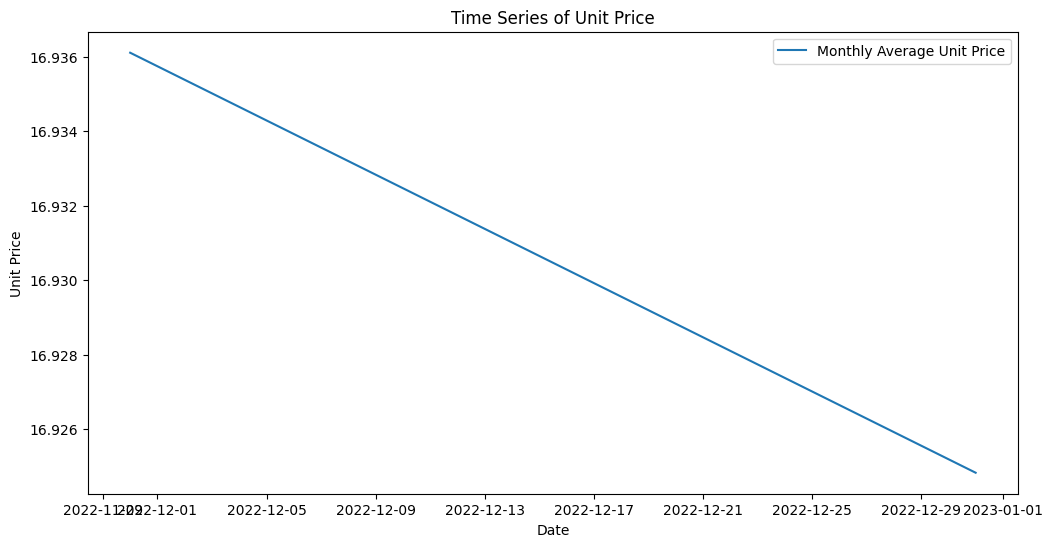

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Average Unit Price')
plt.title('Time Series of Unit Price')
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.legend()
plt.show()


As the chunk of dataset is only for month, the visualisations for month is not useful but when it will be applied on the whole dataset, we will get a proper graph.

In [26]:
data_clean.shape

(11870203, 18)

In [18]:
print(data_clean['RunDate'].min())
print(data_clean['RunDate'].max())
print(data_clean['unit_price'].describe())


2022-11-09 00:00:00
2022-12-03 00:00:00
count    1.187020e+07
mean     7.131098e+00
std      1.404872e+01
min      0.000000e+00
25%      1.200000e+00
50%      2.420000e+00
75%      5.670000e+00
max      3.368400e+02
Name: unit_price, dtype: float64


In [17]:
# Check the number of unique dates in the dataset
print(data.index.min(), data.index.max())
print("Number of unique dates:", data.index.nunique())


2022-11-09 00:00:00 2022-12-03 00:00:00
Number of unique dates: 25


In [7]:
# Resample to weekly frequency and aggregate 'unit_price'
weekly_data = data['unit_price'].resample('W').mean()


In [8]:
weekly_data.shape

(4,)

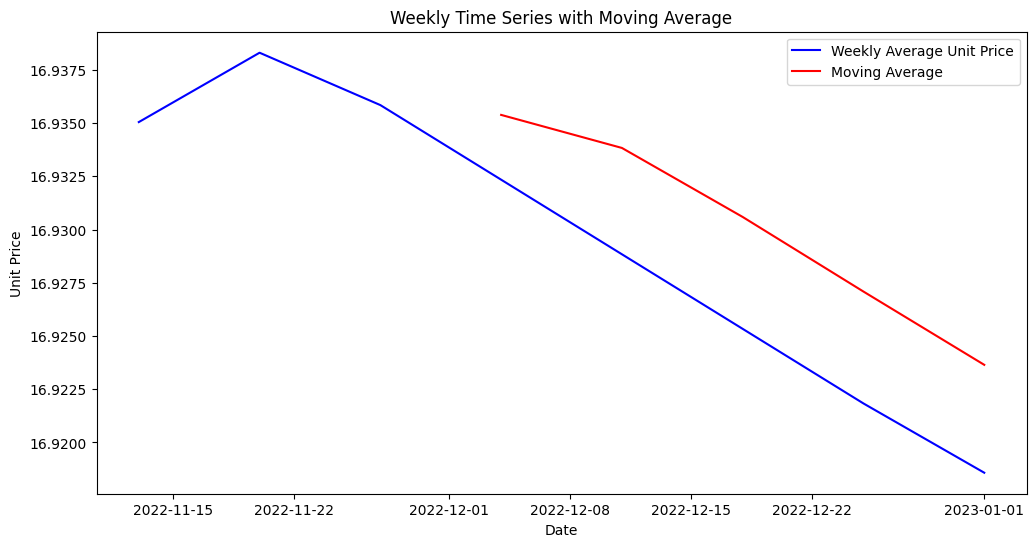

In [65]:
# Apply a moving average with a window size of 4 weeks (or adjust as needed)
moving_avg = weekly_data.rolling(window=4).mean()

# Plot the original data and moving average
plt.figure(figsize=(12, 6))
plt.plot(weekly_data, label='Weekly Average Unit Price', color='blue')
plt.plot(moving_avg, label='Moving Average', color='red')
plt.title('Weekly Time Series with Moving Average')
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.legend()
plt.show()


## Pre-processing task

In [3]:
import pandas as pd

# Ensure 'RunDate' is in datetime format
data_clean['RunDate'] = pd.to_datetime(data_clean['RunDate'])

# Set 'RunDate' as the index
data = data_clean.set_index('RunDate')

# Verify that the index is now a DatetimeIndex
print(data.index)


DatetimeIndex(['2022-11-09', '2022-11-09', '2022-11-09', '2022-11-09',
               '2022-11-09', '2022-11-09', '2022-11-09', '2022-11-09',
               '2022-11-09', '2022-11-09',
               ...
               '2022-12-03', '2022-12-03', '2022-12-03', '2022-12-03',
               '2022-12-03', '2022-12-03', '2022-12-03', '2022-12-03',
               '2022-12-03', '2022-12-03'],
              dtype='datetime64[ns]', name='RunDate', length=11870203, freq=None)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11870203 entries, 2022-11-09 to 2022-12-03
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Sku                     object 
 1   city                    object 
 2   Package_price           float64
 3   Postal_code             int64  
 4   Category                object 
 5   Sub_category            object 
 6   Product_Group           object 
 7   Product_Name            object 
 8   is_estimated            int64  
 9   is_special              int64  
 10  Product_Url             object 
 11  Brand                   object 
 12  unit_price              float64
 13  unit_price_unit         object 
 14  state                   object 
 15  tid                     int64  
 16  uniform_price_per_unit  float64
 17  package_size_in_grams   float64
dtypes: float64(4), int64(4), object(10)
memory usage: 1.7+ GB


In [5]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['Sku', 'city', 'Category', 'Sub_category', 'Product_Group', 'Product_Name',
                       'Product_Url', 'Brand', 'unit_price_unit', 'state']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Check the results
data.head()


,Sku,city,Package_price,Postal_code,Category,Sub_category,Product_Group,Product_Name,is_estimated,is_special,Product_Url,Brand,unit_price,unit_price_unit,state,tid,uniform_price_per_unit,package_size_in_grams
RunDate,,,,,,,,,,,,,,,,,,
2022-11-09,295,66,7.15,2044,4,19,39,5381,1,0,12397,196,6.50,10,1,29742568,6.5,1100.0
2022-11-09,161,58,3.00,9172,5,6,43,2141,0,1,339892,532,3.00,0,5,30129936,30.0,100000.0
2022-11-09,196,61,5.70,4067,5,20,168,4804,0,0,262594,732,1.52,0,3,29879318,15.2,375000.0
2022-11-09,2303,61,4.00,4067,5,20,168,2159,0,0,263203,853,0.95,0,3,29879319,9.5,420000.0
2022-11-09,6335,58,5.00,9172,5,6,43,5566,0,0,338803,234,3.13,0,5,30129935,31.3,160000.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11870203 entries, 2022-11-09 to 2022-12-03
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Sku                     int64  
 1   city                    int64  
 2   Package_price           float64
 3   Postal_code             int64  
 4   Category                int64  
 5   Sub_category            int64  
 6   Product_Group           int64  
 7   Product_Name            int64  
 8   is_estimated            int64  
 9   is_special              int64  
 10  Product_Url             int64  
 11  Brand                   int64  
 12  unit_price              float64
 13  unit_price_unit         int64  
 14  state                   int64  
 15  tid                     int64  
 16  uniform_price_per_unit  float64
 17  package_size_in_grams   float64
dtypes: float64(4), int64(14)
memory usage: 1.7 GB


In [15]:
# Resample to every 3 days and aggregate 'unit_price' (or any other column you need)
resampled_data_3d = data.resample('3D').mean()

# Check the result
resampled_data_3d.head()


,Sku,city,Package_price,Postal_code,Category,Sub_category,Product_Group,Product_Name,is_estimated,is_special,Product_Url,Brand,unit_price,unit_price_unit,state,tid,uniform_price_per_unit,package_size_in_grams
RunDate,,,,,,,,,,,,,,,,,,
2022-11-09,3994.260296,36.423211,6.406060,5595.886211,3.717645,9.816495,108.712572,3603.627173,0.044865,0.262674,207810.010059,475.907869,7.131978,3.349869,3.585623,29986887.5,40.806601,220697.998454
2022-11-12,3994.260296,36.423211,6.408312,5595.886211,3.717645,9.816495,108.712572,3603.627173,0.044865,0.262674,207810.010059,475.907869,7.129882,3.348539,3.585623,29986887.5,37.367740,220708.719521
2022-11-15,3994.260296,36.423211,6.410786,5595.886211,3.717645,9.816495,108.712572,3603.627173,0.044865,0.262674,207810.010059,475.907869,7.130458,3.347855,3.585623,29986887.5,36.984747,220709.578033
2022-11-18,3994.260296,36.423211,6.413528,5595.886211,3.717645,9.816495,108.712572,3603.627173,0.044865,0.262674,207810.010059,475.907869,7.130514,3.347685,3.585623,29986887.5,37.213305,220721.149787
2022-11-21,3994.260296,36.423211,6.416456,5595.886211,3.717645,9.816495,108.712572,3603.627173,0.044865,0.262674,207810.010059,475.907869,7.129268,3.348439,3.585623,29986887.5,37.305545,220719.426512


## Model Building

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_filtered is your DataFrame and it's already resampled to weekly frequency
#df_filtered = weekly_data.resample('W').mean()

# Drop any rows with NaN values
resampled_data_3d.dropna(inplace=True)


In [9]:
df_filtered.head()

,unit_price
RunDate,
2022-11-13,7.131074
2022-11-20,7.130447
2022-11-27,7.129747
2022-12-04,7.133770


In [10]:
# Define features and target variable
# For example, predicting 'unit_price'
X = resampled_data_3d.index.values.reshape(-1, 1)  # Feature: date index
y = resampled_data_3d['unit_price'].values          # Target: unit_price

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


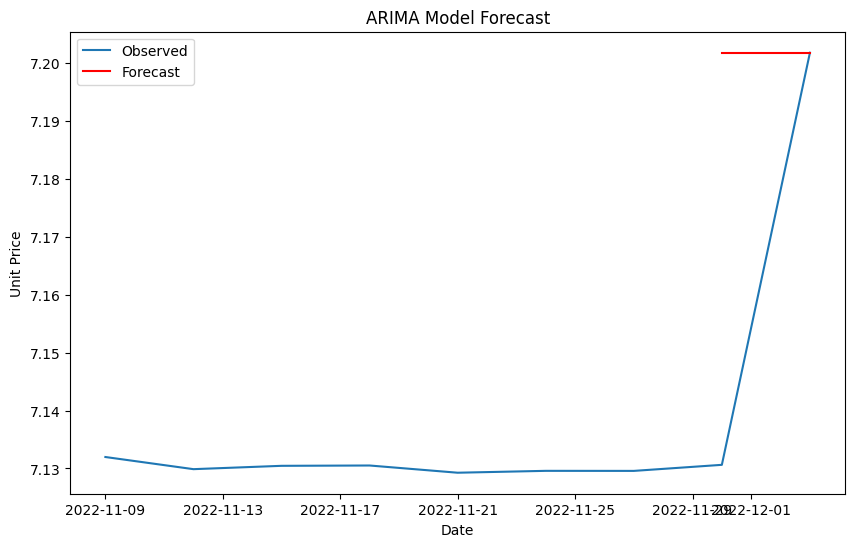

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define and fit the ARIMA model
model = ARIMA(resampled_data_3d['unit_price'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=len(X_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(resampled_data_3d.index, resampled_data_3d['unit_price'], label='Observed')
plt.plot(resampled_data_3d.index[-len(forecast):], forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


## Evaluation Metrics

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 0.035549748237761136
MSE: 0.0025275669555482527
RMSE: 0.050274913779620276


### Model Performance Metrics Interpretation

The model's performance was evaluated using three key metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Below is a detailed interpretation of each metric:

1. **Mean Absolute Error (MAE):**  
   The MAE for the model is `0.0355`. This metric indicates that, on average, the model's predictions differ from the actual `unit_price` by 0.0355 units. In practical terms, this means that the model's price predictions are typically off by a small margin, which reflects a reasonably accurate model given the context.

2. **Mean Squared Error (MSE):**  
   The MSE is calculated to be `0.0025`. MSE measures the average squared difference between the predicted and actual values. Because it squares the errors, larger errors have a more significant impact on the MSE. The low value of 0.0025 suggests that large errors are uncommon, and the model is generally making predictions close to the actual `unit_price`.

3. **Root Mean Squared Error (RMSE):**  
   The RMSE, which is the square root of the MSE, stands at `0.0503`. This metric is in the same unit as the target variable (`unit_price`) and provides an overall indication of the model's prediction error. The RMSE of 0.0503 suggests that the model's predictions are generally within 0.0503 units of the actual prices, on average. This low RMSE indicates a high level of accuracy in the model's predictions.

### Conclusion

The low values of MAE, MSE, and RMSE demonstrate that the model is making accurate predictions with minimal error. These metrics indicate that the model is well-suited for the task of predicting `unit_price` within the dataset provided. However, it's essential to consider these results in the context of the specific business requirements to ensure they meet the necessary accuracy standards.